# Project II - DG Food Agro 

## Objective
Cluster the countries based on various sales data provided to us across years

## Solution
1. Data Load
2. Data Wrangling
3. Dimensionality Reduction
4. Clustering using K-Means
5. Cluster Results Analysis
6. Extract and Save Results onto Excel Spreadsheet
7. Results Analysis - Presentation of Countries Cluster

In [1]:
# Import Python Libraries
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics # for the check the error and accuracy of the model

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
# Step 1 - Data Load
df_dg_data = pd.read_csv('C:/Users/Sri/data/MLProject/proj_Project_Data_2_Str.csv')
# 2nd DF for holding onto original data for later Reference
df_dg_data_orig = pd.read_csv('C:/Users/Sri/data/MLProject/proj_Project_Data_2_Str.csv')
df_dg_data.head(5)

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [3]:
# Computing the SWT mean for each Country for later Reference
df_dg_data_year = df_dg_data.drop(['Sales of Wheat in tons'], axis=1)
df_dg_data_year['Mean'] = np.mean(df_dg_data_year, axis=1)
#df_dg_data_year.info()
df_dg_data_year.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Mean
0,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,353.333333
1,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,36.944444
2,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,47.388889
3,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,12.277778
4,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,25.277778


In [4]:
df_dg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
Sales of Wheat in tons    207 non-null object
1990                      207 non-null int64
1991                      207 non-null int64
1992                      207 non-null int64
1993                      207 non-null int64
1994                      207 non-null int64
1995                      207 non-null int64
1996                      207 non-null int64
1997                      207 non-null int64
1998                      207 non-null int64
1999                      207 non-null int64
2000                      207 non-null int64
2001                      207 non-null int64
2002                      207 non-null int64
2003                      207 non-null int64
2004                      207 non-null int64
2005                      207 non-null int64
2006                      207 non-null int64
2007                      207 non-null int64
dtypes: int64(18), object(1)
memory usa

In [5]:
# Step 2 - Data Wrangling - Encode Country Name
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_dg_data['Sales of Wheat in tons'])
#list(le.classes_)
df_dg_data['Sales of Wheat in tons'] = le.transform(df_dg_data['Sales of Wheat in tons'])
df_dg_data.head(5)

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,0,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,1,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,2,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,3,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,4,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [6]:
df_dg_data_new = df_dg_data.astype(np.int64)

In [7]:
# Step 3 - Dimensionality Reduction - PCA approach

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_dg_data_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print (pca.explained_variance_ratio_)

[0.91396073 0.06028613]


In [9]:
# The top 2 PCA's together explain 99% of Variance, so PERFECT!

In [10]:
# PCA Transformation
dg_2d = pca.transform(df_dg_data_new)
dg_df_2d = pd.DataFrame(dg_2d)
dg_df_2d.index = df_dg_data_new.index
dg_df_2d.columns = ['PC1','PC2']
dg_df_2d.head()

,PC1,PC2
0,731.873089,202.604852
1,-613.629112,3.982416
2,-569.633346,-37.564138
3,-717.408241,4.747414
4,-662.124716,10.326207


In [11]:
print(type(dg_df_2d))
dg_df_2d.columns

<class 'pandas.core.frame.DataFrame'>


Index(['PC1', 'PC2'], dtype='object')

In [12]:
# Attach the column "country" to the PCA DataFrame
dg_df_2d['SWT'] = df_dg_data_new['Sales of Wheat in tons']
dg_df_2d.columns
dg_df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
PC1    207 non-null float64
PC2    207 non-null float64
SWT    207 non-null int64
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


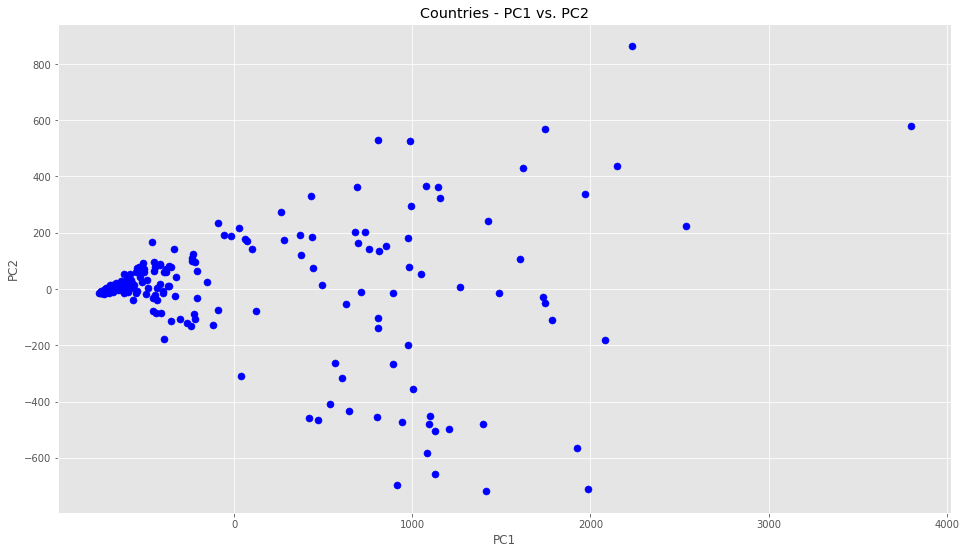

In [13]:
# Plotting the PC1 and PC2 distribution
print(type(dg_df_2d))
#Getting the values and plotting it
plt.rcParams['figure.figsize'] = (16,9)

plt.style.use('ggplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Countries - PC1 vs. PC2')

f1 = dg_df_2d['PC1'].values
f2 = dg_df_2d['PC2'].values
X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c = 'blue', s =50)

print(type(X))

In [14]:
# Using Standard Scaler to transform both the columns in same range

from sklearn.preprocessing import StandardScaler ## missing in the code snippet provided

print (type(dg_df_2d))
sc = StandardScaler()
newdata = sc.fit_transform(dg_df_2d)

print (" newData Type = ", newdata)

<class 'pandas.core.frame.DataFrame'>
 newData Type =  [[ 8.60001536e-01  9.26975675e-01 -1.72370353e+00]
 [-7.21056678e-01  1.82207044e-02 -1.70696854e+00]
 [-6.69358608e-01 -1.71866772e-01 -1.69023355e+00]
 [-8.43004338e-01  2.17207903e-02 -1.67349857e+00]
 [-7.78042369e-01  4.72453763e-02 -1.65676358e+00]
 [ 1.16356375e+00  1.34280877e+00 -1.64002860e+00]
 [-7.27611458e-01 -6.95433152e-02 -1.62329361e+00]
 [-8.50713776e-01 -2.77201249e-02 -1.60655863e+00]
 [-5.97586384e-01  2.76131335e-01 -1.58982364e+00]
 [-5.34491139e-01 -3.64476737e-01 -1.57308865e+00]
 [-8.72932737e-01 -6.59453377e-02 -1.55635367e+00]
 [-8.41591571e-01 -3.03220417e-02 -1.53961868e+00]
 [-4.82380993e-01 -3.85076689e-01 -1.52288370e+00]
 [-6.50437680e-01 -6.60431700e-02 -1.50614871e+00]
 [-5.21461785e-01  3.52024941e-01 -1.48941373e+00]
 [ 1.67154011e+00  1.10738586e+00 -1.47267874e+00]
 [-8.78571049e-01 -4.55510701e-02 -1.45594376e+00]
 [-5.08702086e-01 -1.84427815e-01 -1.43920877e+00]
 [-8.41414953e-01 -4.272722

C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
# Creating Data Frame with the PCA and Country Index column
newdata=pd.DataFrame(newdata,columns=['PC1','PC2','SWT'])
newdata

,PC1,PC2,SWT
0,0.860002,0.926976,-1.723704
1,-0.721057,0.018221,-1.706969
2,-0.669359,-0.171867,-1.690234
3,-0.843004,0.021721,-1.673499
4,-0.778042,0.047245,-1.656764
5,1.163564,1.342809,-1.640029
6,-0.727611,-0.069543,-1.623294
7,-0.850714,-0.027720,-1.606559
8,-0.597586,0.276131,-1.589824
9,-0.534491,-0.364477,-1.573089


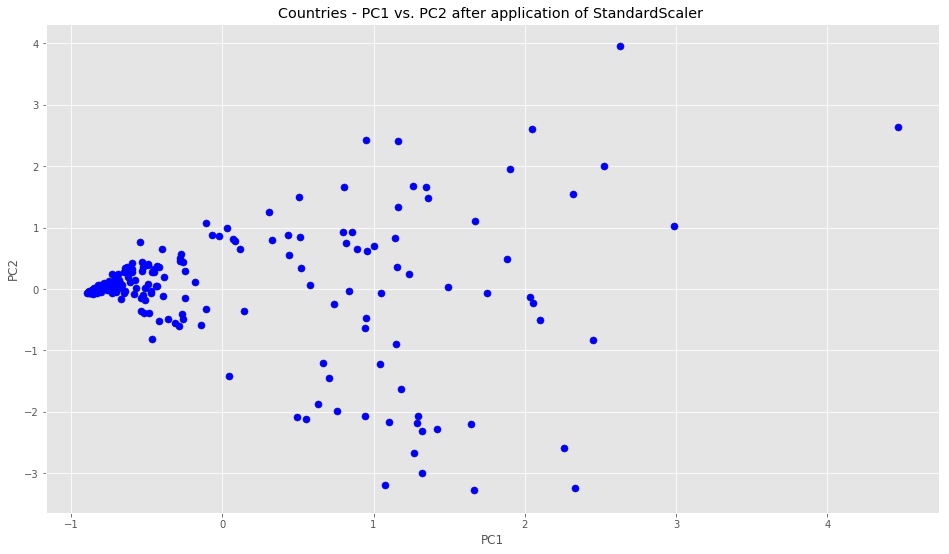

In [16]:
#  Plotting the columns in DF with  Standardized (normalized) values
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Countries - PC1 vs. PC2 after application of StandardScaler ')

f1 = newdata['PC1'].values
f2 = newdata['PC2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c = 'blue', s =50)

In [17]:
# Step 4 - Clustering using K-Means
# Placing Centroids at Random Positions
def dist(a,b, ax=1):
    return np.linalg.norm(a-b, axis = ax)

#Number of Clusters
k = 4
#k = 2   #Changed to 2, based on the suggestion in the Edureka Solution

#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size = k)
#Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size = k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)
print("C_x = ", C_x )
print("C_y = ", C_y )

[[0. 3.]
 [2. 0.]
 [2. 0.]
 [0. 1.]]
C_x =  [0 2 2 0]
C_y =  [3 0 0 1]


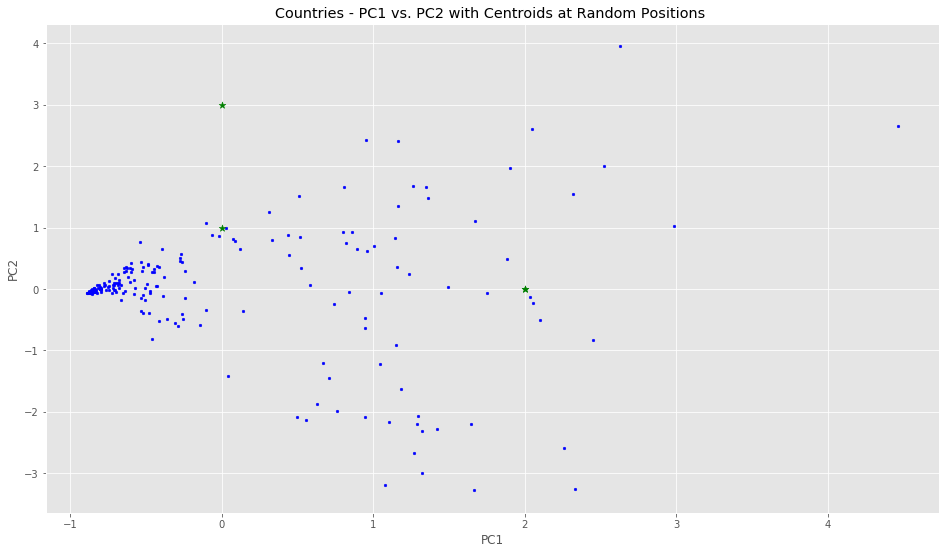

In [18]:
#  Plotting Data Points and Centroids in the Same Plot
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Countries - PC1 vs. PC2 with Centroids at Random Positions ')

#plt.scatter(f1, f2, c = '#050505', s = 7)
plt.scatter(f1, f2, c = 'blue', s = 7)
plt.scatter(C_x, C_y, marker = '*', s = 50, c = 'g')

In [19]:
# Run the algorithm with K=4, using sklearn method 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
newdata_analyze = newdata.drop('SWT',axis=1)
kmeans.fit(newdata_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Determine the cluster center vectors
kmeans.cluster_centers_

array([[ 0.84390504,  0.53966305],
       [-0.64379644,  0.03076412],
       [ 2.07845594,  2.11681991],
       [ 1.19229433, -2.08336093]])

In [21]:
# Step 5 - Results Analysis
# Number of countries present in each of the 4 Clusters
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 38, 1: 133, 2: 12, 3: 24}


In [22]:
# Step 5 - Cluster AnALYSIS
# Cluster the data in 4 groups 
# Locate the clusters center - Print the Cluster Coordinates
# Number of Drivers in each of 4 Cluster

kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(newdata.drop('SWT',axis=1))
kmeans_4.fit(newdata.drop('SWT',axis=1))
print(kmeans_4.cluster_centers_)	
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))
print (type(kmeans_4.cluster_centers_))
kmeans_4.cluster_centers_[:,0]

[[-0.64379644  0.03076412]
 [ 0.84390504  0.53966305]
 [ 1.19229433 -2.08336093]
 [ 2.07845594  2.11681991]]
{0: 133, 1: 38, 2: 24, 3: 12}
<class 'numpy.ndarray'>


array([-0.64379644,  0.84390504,  1.19229433,  2.07845594])

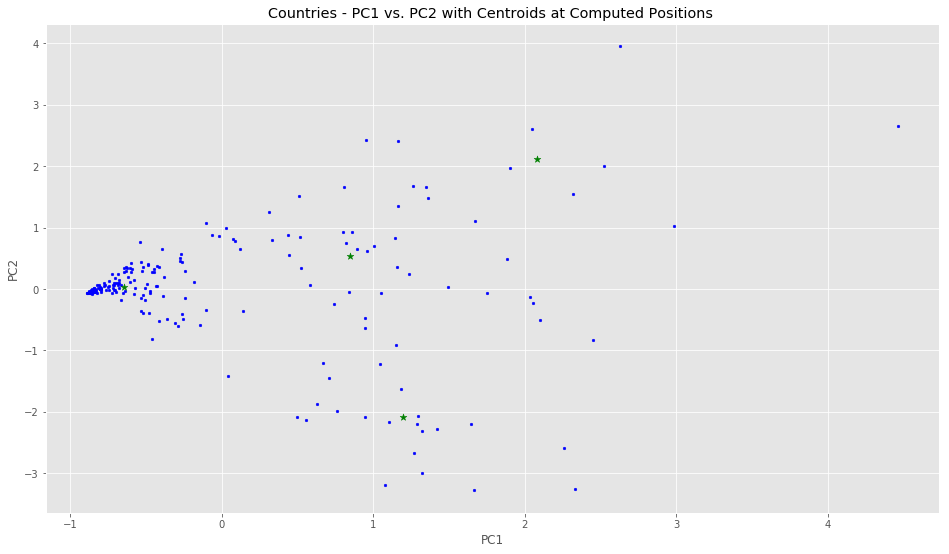

In [23]:
#Plotting Data Points and Centroids in the Same Plot and draw visual inference
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Countries - PC1 vs. PC2 with Centroids at Computed Positions ')

f1 = newdata_analyze['PC1'].values
f2 = newdata_analyze['PC2'].values
C_x = kmeans_4.cluster_centers_[:,0]
C_y = kmeans_4.cluster_centers_[:,1]
plt.scatter(f1, f2, c = 'blue', s = 7)
plt.scatter(C_x, C_y, marker = '*', s = 50, c = 'g')

In [24]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
PC1    207 non-null float64
PC2    207 non-null float64
SWT    207 non-null float64
dtypes: float64(3)
memory usage: 4.9 KB


In [29]:
# Create a new column with the MEAN of Sales per country, over the years
newdata2 = newdata.drop(['SWT'], axis = 1)
newdata2['Sales of Wheat in tons'] = df_dg_data_orig['Sales of Wheat in tons']
newdata2['Mean']= df_dg_data_year['Mean']

newdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
PC1                       207 non-null float64
PC2                       207 non-null float64
Sales of Wheat in tons    207 non-null object
Mean                      207 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.5+ KB


newdata2.head(5)

In [31]:
# Step 6 - Extract and Save Results onto Excel Spreadsheet

newdata2.to_excel('C:/Users/Sri/data/MLProject/newdata2-df.xlsx', sheet_name = 'SWT-PCs', index=False)

# Step 7 -  Results Analysis - Presentation of Countries Cluster

**(Refer to the Color coded Spreadsheet attachement "Results Analysis - Presentation of Countries Cluster")**

## Process Steps
1. Post in column-F, the Cluster 1, PC1 coordinate (CL1_PC1) (same value in ALL rows)
2. Post in column-G, the Cluster 1, PC2 coordinate (CL1_PC2) (same value in ALL rows)
3. Post in column-I, the diffrence of column-A and column-F (PC1 - CL1_PC1) - distance between each country's PC1 from Node 1's PC1
4. Post in column-J, the diffrence of column-A and column-J (PC2 - CL1_PC2) - distance between each country's PC2 from Node 1's PC2
5. Outer Sort on Column - I, Inner Sort on Column -J
6. Use the count of countries in each cluster and post the cluster# in Column - L

## Observations
1. The result ia automatically sorted in ascending order of country's Mean export!
2. Cluster 3, as expected, has the list of **countries with the HIGHEST export to**
3. Cluster 0, as expected, has the list of **countries with the LEAST export to**

## Inferences
1. New DG Food Agro should continue to focus on countries in **Cluster 3 since they provide the Maximum Export Values**
2. New DG Food Agro should STEP of efforts on countries in **Cluster 0 since theyprovide the LEAST Export Values**